## UNDERSTANDING THE INEFFICTIVENESS OF MARKETTING CAMPAIGNS 

**As a data scientist, I follow a general set of steps to solve problems using data. These steps can be summarized as follows:**
1. Problem Definition
1. Data Collection
1. Data Cleaning and Preprocessing
1. Feature Engineering
1. Exploratory Data Analysis (EDA)
1. Model Selection and Training
1. Model Evaluation and Hyperparameter Tuning
1. Model Deployment
1. Communication and Visualization
1. Iteration and Improvement
* These steps provide a general framework for me to approach real-world projects. However, the actual process may vary depending on the specific problem.

# Problem Definition

**My boss has told me that our campaigns have not been as effective as they were expected to be and asked me to analyze the data to understand this problem and propose data-driven solutions**

In [1]:
import pandas as pd
import numpy as np
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Blues_r')
# handle missing values
import missingno as msno
from sklearn.impute import KNNImputer
#Ignore warnings until end
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/kaggle/input/marketing-data/marketing_data.csv')

Column Details:

ID: Customer's Unique Identifier

Year_Birth: Customer's Birth Year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

MntWines: Amount spent on wine in the last 2 years

MntFruits: Amount spent on fruits in the last 2 years

MntMeatProducts: Amount spent on meat in the last 2 years

MntFishProducts: Amount spent on fish in the last 2 years

MntSweetProducts: Amount spent on sweets in the last 2 years

MntGoldProds: Amount spent on gold in the last 2 years

NumDealsPurchases: Number of purchases made with a discount

NumWebPurchases: Number of purchases made through the company's web site

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company's web site in the last month

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise (Target variable)

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise (Target variable)

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise (Target variable)

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise (Target variable)

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise (Target variable)

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise (Target variable)

Complain: 1 if customer complained in the last 2 years, 0 otherwise

Country: Customer's location

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

# Data Cleaning and Preprocessing

**Removing Irrelevant or Redundant Features**

In [5]:
data.drop('ID',axis=1,inplace=True)

1.  **Clean columns name from space** 
1.  **Handling inconsistent data**

In [6]:
data.columns = data.columns.str.replace(' ', '') # to delete any space in colunms name (income has space)
data['Income'] = data['Income'].str.replace('$', '').str.replace(',', '').astype(float) #delete first string ($) and (,)and change type to float
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer']) #Dt_Customer is object so  we will trun it to datetime

**Encoding categorical variables**

In [7]:
data['Marital_Status']=data['Marital_Status'].map({'Divorced':1, 'Single':1, 'Married':2, 'Together':2, 'Widow':1, 'YOLO':1,
'Alone':1, 'Absurd':1})

**Handling missing value**
1. removing rows or columns with missing values 
1. Impute missing values with a constant value (e.g., mean, median) 
1. Impute missing values with a predicted value such as linear regression or k-nearest neighbors.

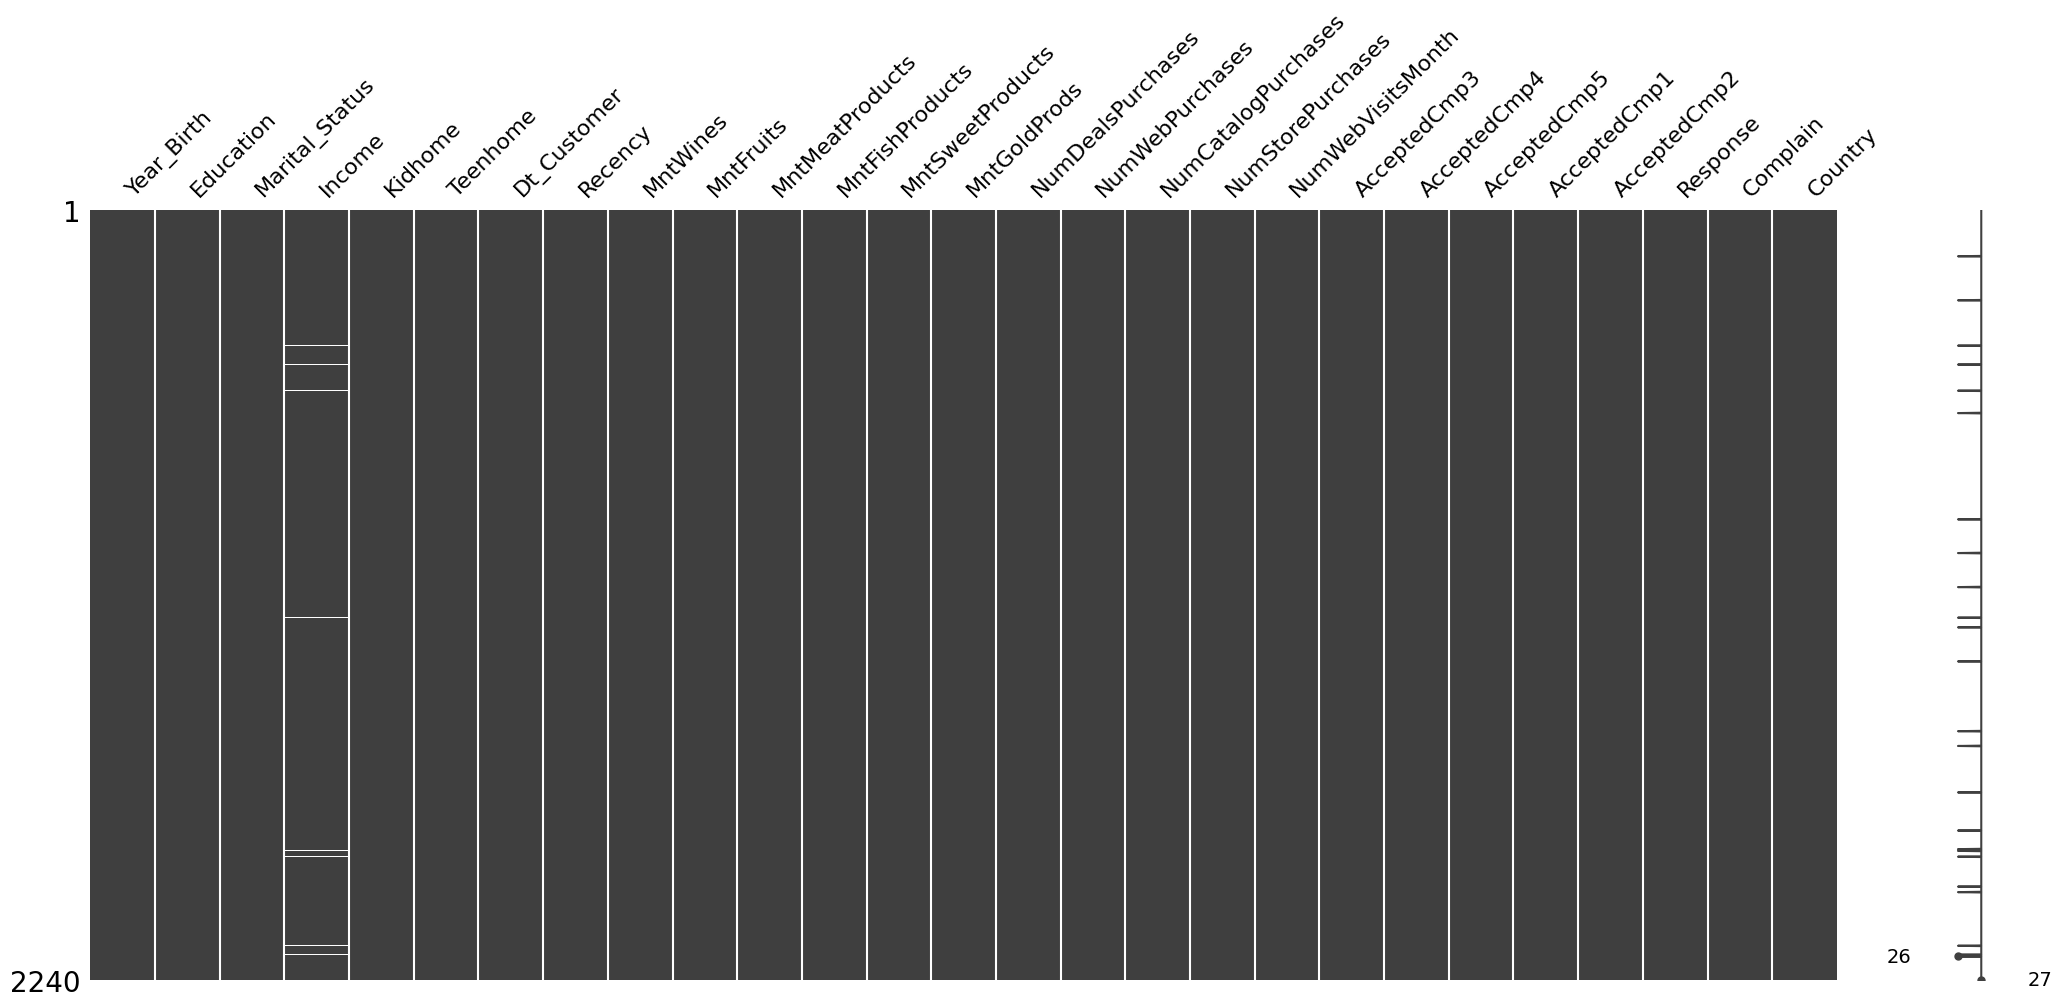

In [8]:
# show missing values in columns
msno.matrix(data)
plt.show()

In [9]:
missingvalues = data.isnull().sum().sort_values(ascending=False)
print(missingvalues.loc[missingvalues!=0], '\n')

Income    24
dtype: int64 



Text(0.5, 1.0, 'Income distribution')

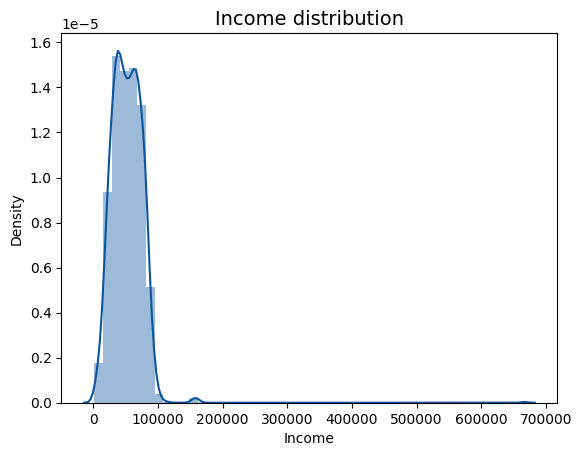

In [10]:
# We can drop missing values because their number is small, but we will deal with these missing values
#  Now show income distribution to use best way to handle missing values
sns.distplot(data['Income'])
plt.title('Income distribution', size=14)

In [11]:
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(data[['Income']])
Income_impute=pd.DataFrame(imputed_data,columns=['Income'])
data['Income']=Income_impute['Income'].reset_index(drop=True)
print('Sum of missing values:',data.isnull().sum().sum())

Sum of missing values: 0


**Dealing with outliers**
* **methods for detecting outliers**
1. Statistical methods such as Z-score , Interquartile range (IQR)
1. Distance-based methods such as K-nearest neighbors (KNN) , Isolation forest
1. Model-based methods such as One-class support vector machines (SVMs) , Clustering
* **deal with outliers**
1. Remove the outliers
1. Transform the outliers : This method involves transforming the outliers so that they are more consistent with the rest of the data. There are a number of different ways to do this, such as winsorization and capping. Winsorization involves replacing the outliers with the nearest non-outlier values. Capping involves replacing the outliers with a maximum or minimum value.
1. Model the outliers : This method involves fitting a model to the outliers and then using this model to predict the values of the outliers

In [12]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

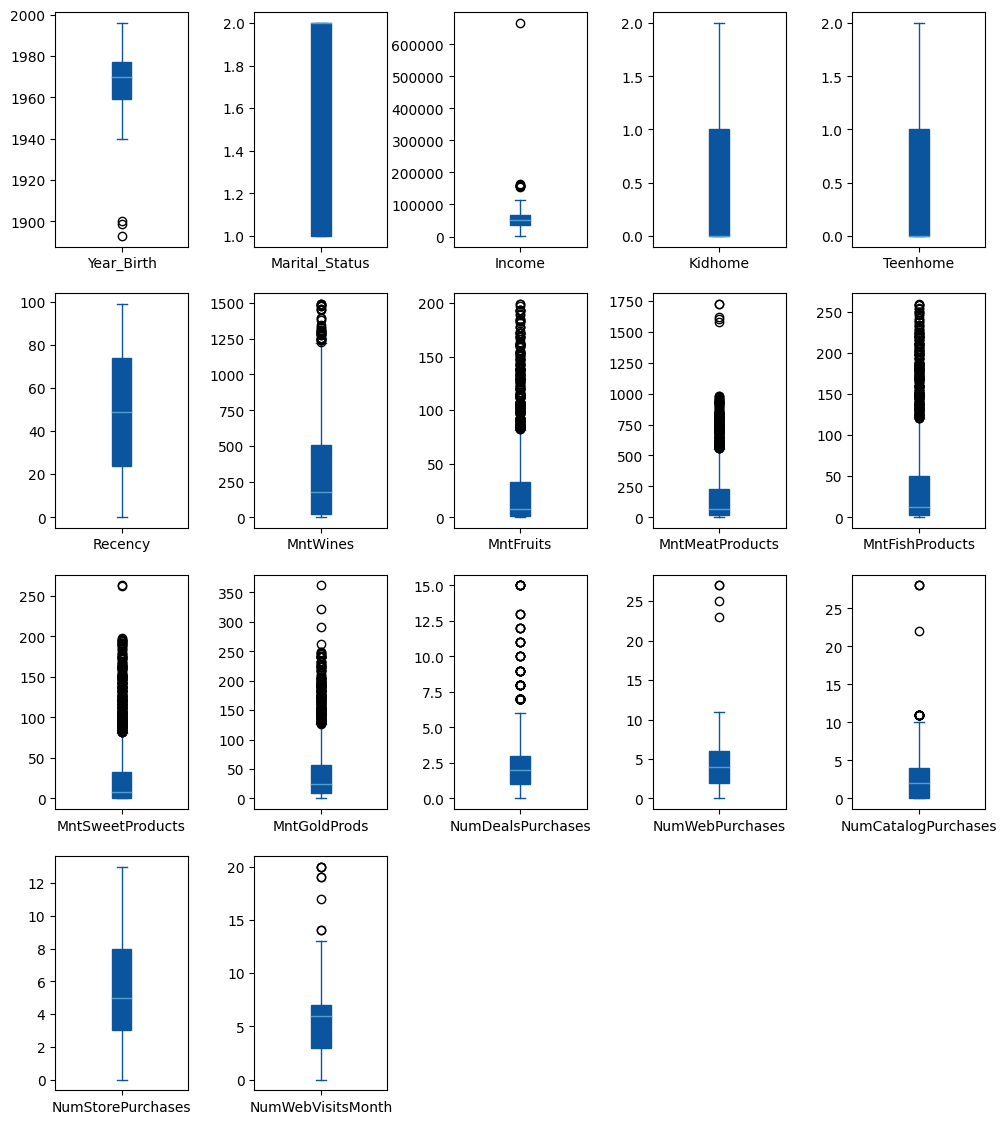

In [13]:
data_boxplot = data.drop(columns=[ 'AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                                  'Response', 'Complain','Education','Country'])
data_boxplot.plot(subplots=True, layout=(4,5), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

* We will not delete all outliers because some outliers are important. We will remove the outliers that are not important, which is Year_Birth.

In [14]:
data = data[data['Year_Birth'] > 1900].reset_index(drop=True)

# Feature Engineering
* Feature Extraction
1. Age variable instead of year of birth
1. Numb_Days variable: It is a variable that calculates the number of days a customer is in the company
1. Family variable is a variable to calculate the number of family members
1. TotalPurchases :Total places of purchase
1. Variable Spending : the sum of the amount spent on product categories
1. TotalCampaignsAcc : Total acceptance of advertising campaigns

In [15]:
data['Age'] = 2023-data['Year_Birth']
data['Customer_Days'] = data['Dt_Customer'].max() - data['Dt_Customer']
data['Family'] = data['Marital_Status']+data['Kidhome']+data['Teenhome']
data['TotalPurchases'] = data['NumWebPurchases']+data['NumCatalogPurchases']+data['NumStorePurchases']
data['Spending'] = data.filter(like='Mnt').sum(axis=1)
data['TotalCampaignsAcc'] = data.filter(like='Accepted').sum(axis=1)+data['Response']

In [16]:
data[['Age','Customer_Days','Family','TotalPurchases','Spending','TotalCampaignsAcc']].head(3)

,Age,Customer_Days,Family,TotalPurchases,Spending,TotalCampaignsAcc
0,53,13 days,1,14,1190,1
1,62,14 days,1,17,577,2
2,65,47 days,3,10,251,0


In [17]:
data['Customer_Days'] = data['Customer_Days'].astype(str).str.replace(' days', '')
# Convert the column to integer data type
data['Customer_Days'] = pd.to_numeric(data['Customer_Days'], downcast='integer')

In [18]:
data.drop(['Year_Birth','Dt_Customer'],axis=1,inplace=True)

# Exploratory Data Analysis (EDA)
* Define the goals of the EDA. What do I want to learn from the data? What questions am I trying to answer?
* There are a number of different techniques that can be used in EDA, including:
1. Univariate analysis 
1. Bivariate analysis
1. Multivariate analysis

**Univariate analysis: This involves analyzing individual variables to understand their distribution, central tendency, and variability. Common univariate analysis techniques include:**
1. Descriptive statistics
1. Histogram
1. Boxplot 
**Bivariate analysis: This involves analyzing the relationship between two variables to identify patterns and trends. Common bivariate analysis techniques include:**
1. Scatter plot
1. Correlation analysis
**Multivariate analysis: This involves analyzing the relationship between multiple variables**

In [19]:
# describe data
data.describe()

,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Age,Customer_Days,Family,TotalPurchases,Spending,TotalCampaignsAcc
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,...,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,1.645060,52236.696036,0.444345,0.506482,49.104604,303.995530,26.270451,166.916853,37.523022,27.068842,...,0.064372,0.013411,0.149307,0.008941,54.098346,353.790344,2.595887,12.544032,605.743406,0.447027
std,0.478602,25043.111847,0.538467,0.544593,28.956073,336.574382,39.715972,225.661158,54.639909,41.293949,...,0.245469,0.115052,0.356471,0.094152,11.701917,202.137961,0.907305,7.205919,601.840466,0.890964
min,1.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,1.000000,0.000000,5.000000,0.000000
25%,1.000000,35523.000000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,46.000000,181.000000,2.000000,6.000000,69.000000,0.000000
50%,2.000000,51717.000000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,53.000000,356.000000,3.000000,12.000000,396.000000,0.000000
75%,2.000000,68281.000000,1.000000,1.000000,74.000000,504.000000,33.000000,232.000000,50.000000,33.000000,...,0.000000,0.000000,0.000000,0.000000,64.000000,529.000000,3.000000,18.000000,1045.000000,1.000000
max,2.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,1.000000,1.000000,1.000000,1.000000,83.000000,699.000000,5.000000,32.000000,2525.000000,5.000000


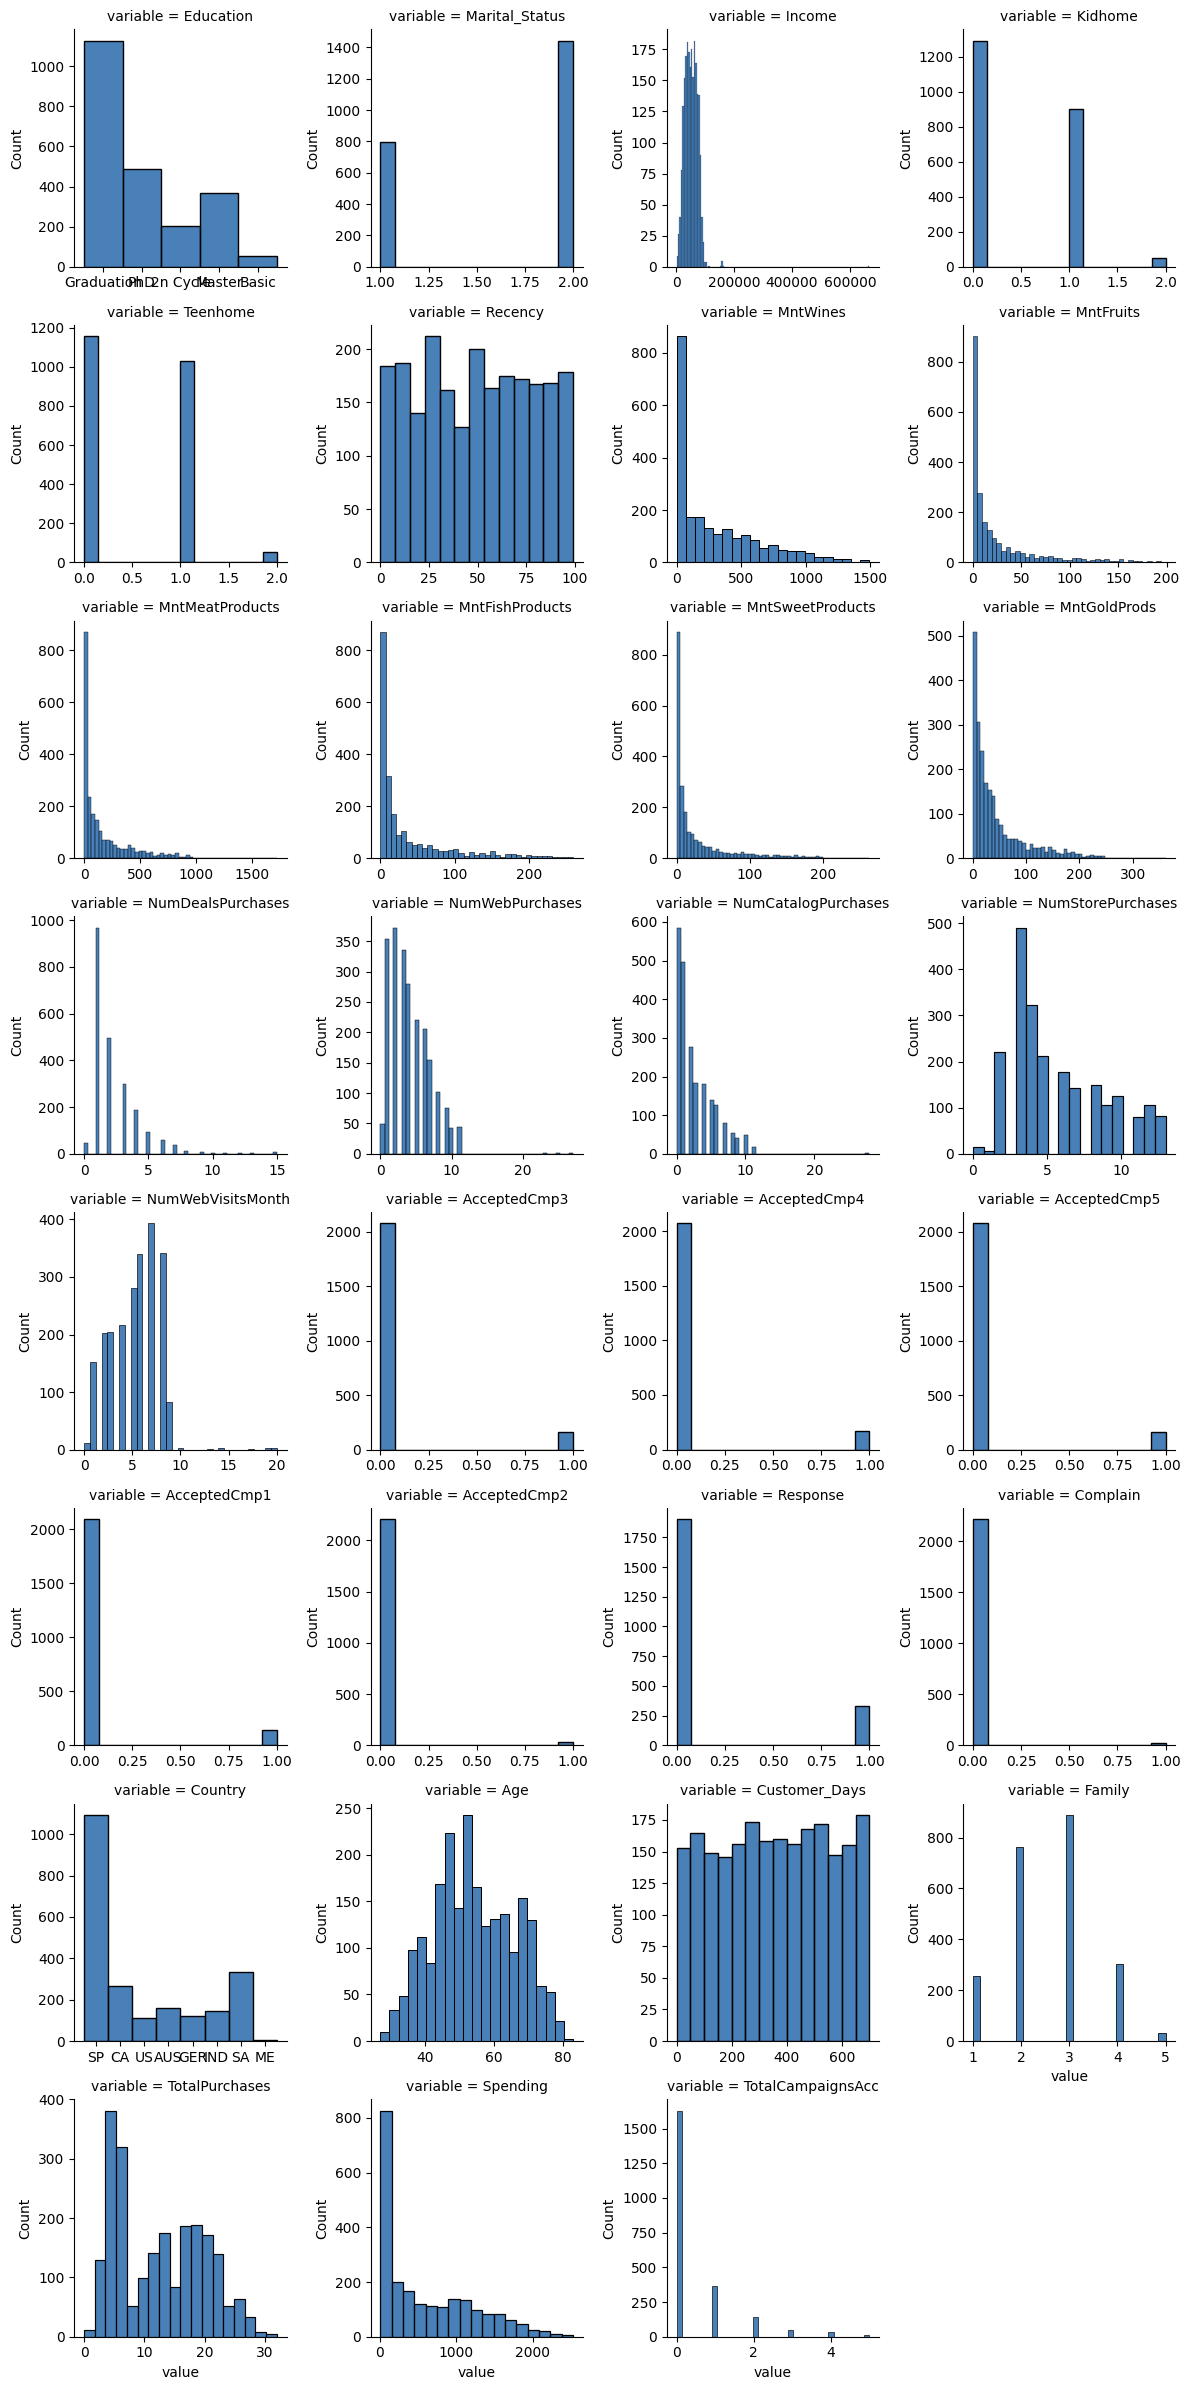

In [20]:
#Data distribution
hist = pd.melt(data, value_vars =data )
hist = sns.FacetGrid (hist, col='variable', col_wrap=4, sharex=False, sharey = False)
hist.map(sns.histplot, 'value')

How many customers have accepted our campaigns

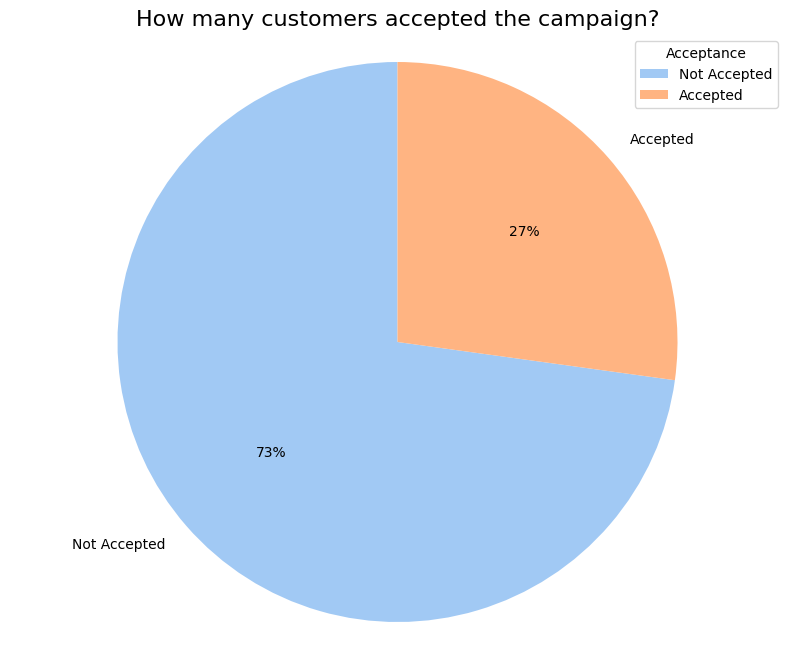

In [21]:
data['is_accepted'] = data['TotalCampaignsAcc'].apply(lambda x: 'Accepted' if x > 0 else 'Not Accepted')

# Set the figure size using plt.subplots
fig, ax = plt.subplots(figsize=(10, 8))

# Calculate value counts and labels
counts = data['is_accepted'].value_counts()
labels = counts.index.tolist()

# Define Seaborn color palette
colors = sns.color_palette('pastel')

# Create pie chart
ax.pie(counts, labels=labels, colors=colors, autopct='%.0f%%', startangle=90)

# Set title and legend
ax.set_title('How many customers accepted the campaign?', fontsize=16)
ax.legend(title='Acceptance', loc='upper right')

# Set aspect ratio to be equal
ax.axis('equal')

# Display the pie chart
plt.show()

**73% of our clients did not accept any advertising campaign**

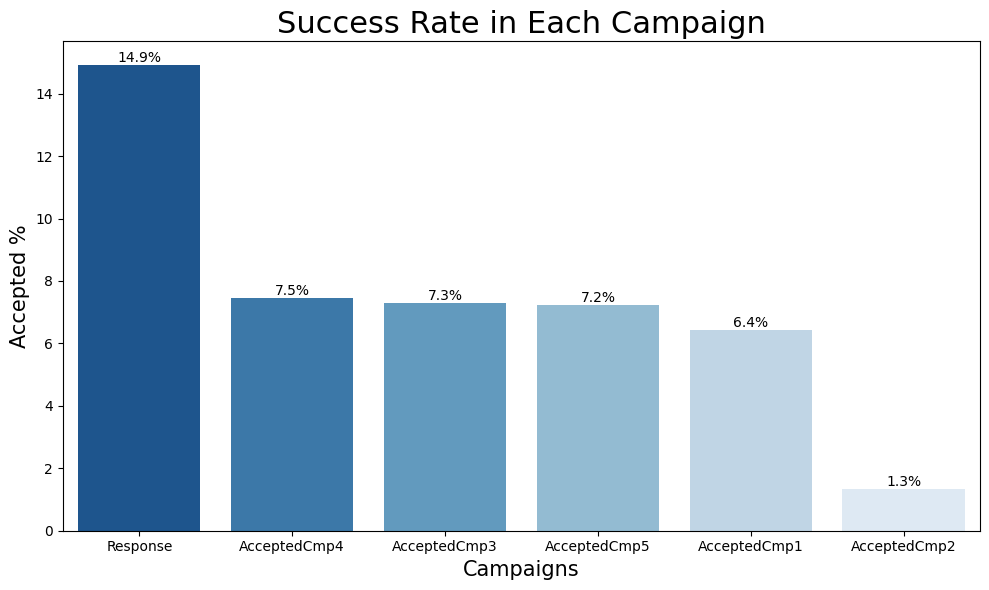

In [22]:
# Success Rate in Each Campaign
AcceptedCmp = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# Create a DataFrame to store the percentage of accepted campaigns
campaigns = pd.DataFrame(data[AcceptedCmp].mean() * 100, columns=['Percent']).reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot
ax = sns.barplot(x='index', y='Percent', data=campaigns.sort_values('Percent', ascending=False))

# Set labels and title
plt.xlabel('Campaigns', size=15)
plt.ylabel('Accepted %', size=15)
plt.title('Success Rate in Each Campaign', size=22)

# Add percentage labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()

1. **The highest acceptance rate for an advertising campaign is the last campaign (Response)**
1. **The lowest acceptance rate for an advertising campaign is the second campaign (AcceptedCmp2)**

In [23]:
data_corr =data.drop(['is_accepted','is_accepted','AcceptedCmp1', 'AcceptedCmp2'
              , 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response','Education','Country'],axis=1).corr()

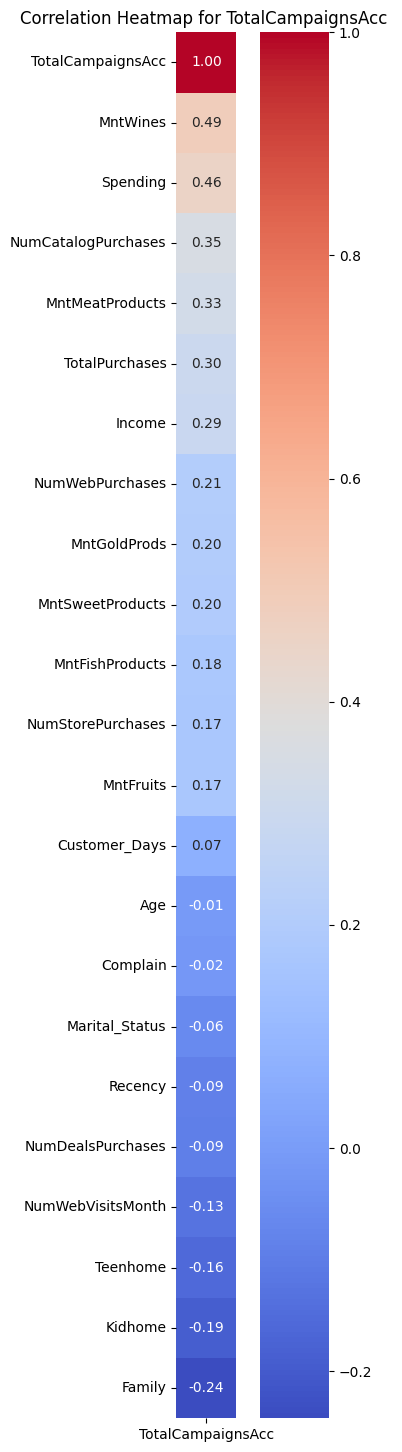

In [24]:
column_corr = data_corr.loc['TotalCampaignsAcc']
plt.figure(figsize=(6, 18))
sns.heatmap(pd.DataFrame(column_corr.sort_values(ascending=False)), annot=True, cmap='coolwarm', cbar=True,square=True,fmt='.2f')
# Set the title 
plt.title('Correlation Heatmap for TotalCampaignsAcc ')
# Display the heatmap
plt.show()

**After presenting the correlation between TotalCampaignsAcc and all variables, I will now present the most important variables that have an impact on TotalCampaignsAcc variable. Perhaps the benefit of this is that some variables do not have a significant relationship effect, but rather have a strong effect. For example, income does not have a strong relationship, but it affects the increase in the quantity purchased (spending), meaning that the greater the income, the greater the spending and the greater TotalCampaignsAcc.**

# RandomForestClassifier Model

In [25]:
from sklearn.ensemble import RandomForestClassifier
X =data.drop(['is_accepted','TotalCampaignsAcc','AcceptedCmp1', 'AcceptedCmp2'
              , 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response','Education','Country'],axis=1)
y = data.TotalCampaignsAcc

In [26]:
clf = RandomForestClassifier(random_state=43)      
clf = clf.fit(X,y)

# feature_importances

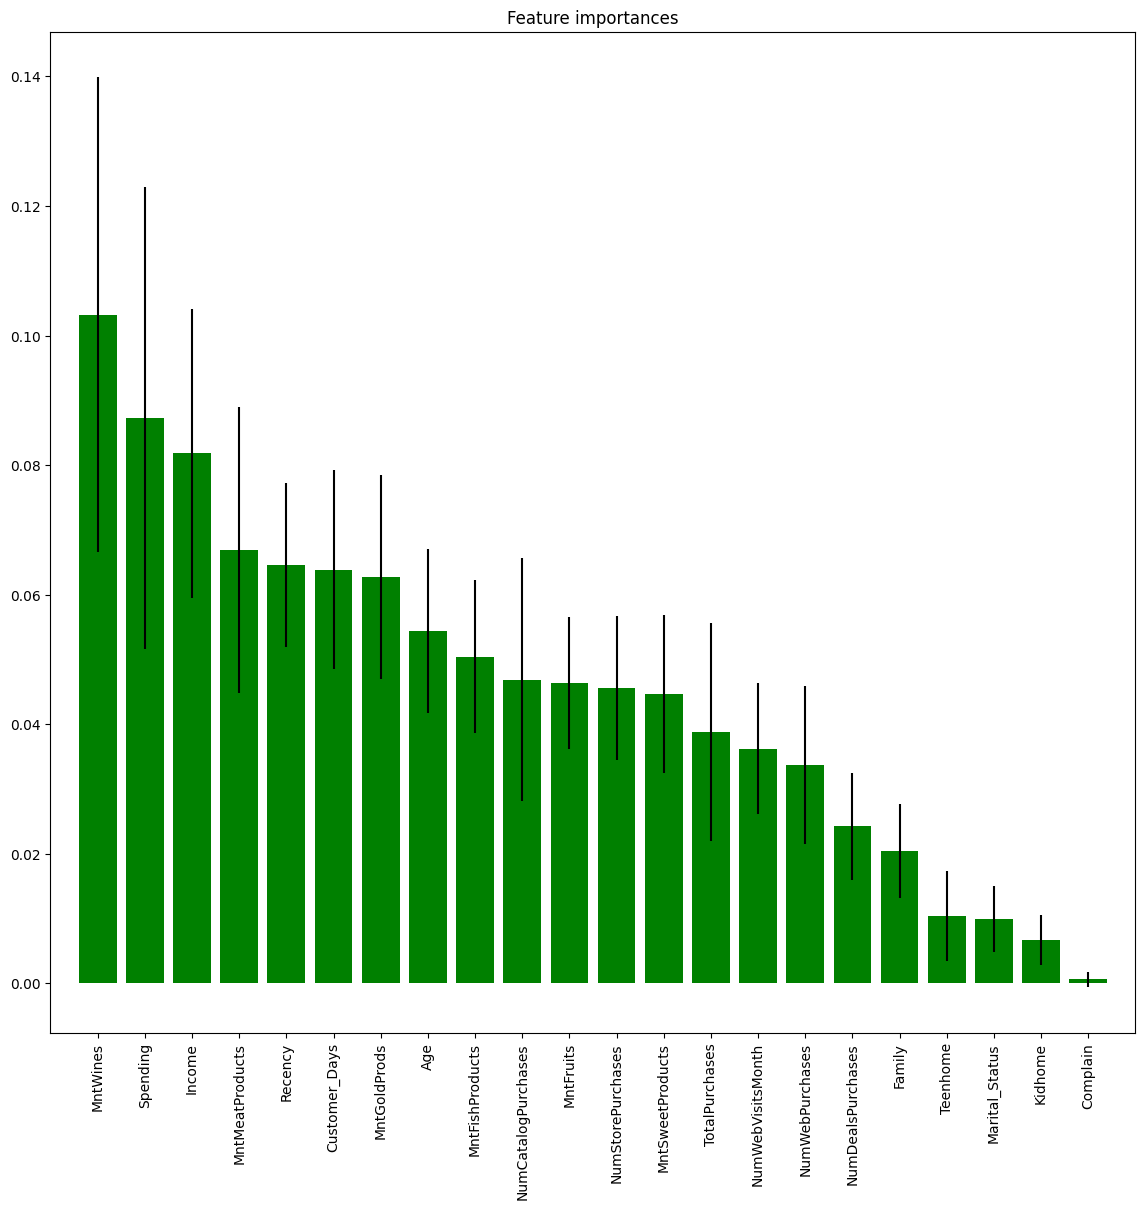

In [27]:
clf_rf = RandomForestClassifier()      
clr_rf = clf_rf.fit(X,y)
importances = clr_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="g", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices],rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

**As we have seen, there is a strong relationship between acceptance of advertising campaigns,MntWines, income, and spending,MntGoldprods,MntMeatProducts.**

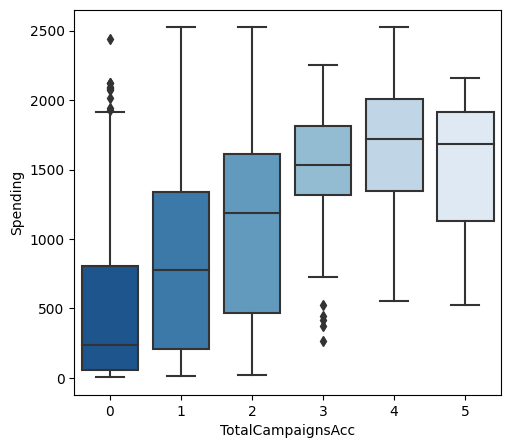

In [28]:
plt.figure(figsize=(5.5,5))
sns.boxplot(x='TotalCampaignsAcc', y='Spending', data=data,palette='Blues_r');

**Acceptance of advertising campaigns increases with increased spending**

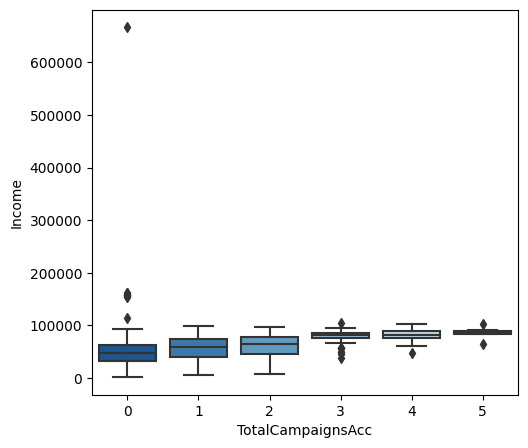

In [29]:
plt.figure(figsize=(5.5,5))
sns.boxplot(x='TotalCampaignsAcc', y='Income', data=data,palette='Blues_r');

**There is a direct relationship between acceptance of advertising campaigns and income. The higher the income, the greater the acceptance of advertising campaigns**

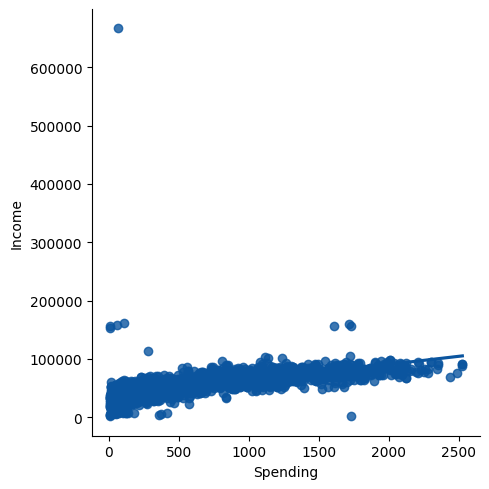

In [30]:
sns.lmplot(x='Spending', y='Income', data=data);

**Increased income leads to increased spending, which leads to increased acceptance of advertising campaigns**

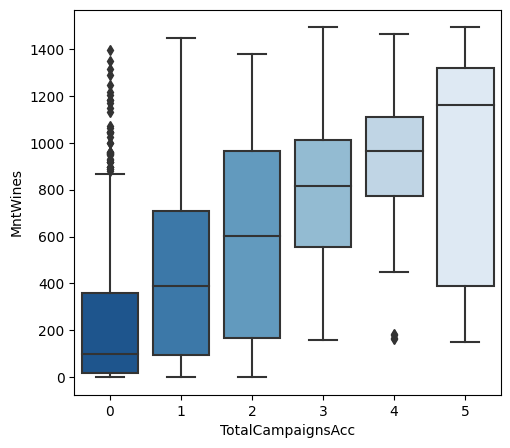

In [31]:
plt.figure(figsize=(5.5,5))
sns.boxplot(x='TotalCampaignsAcc', y='MntWines', data=data,palette='Blues_r');

**We note that there is a positive relationship between Total Campaigns Acc and increased MntWines sales**

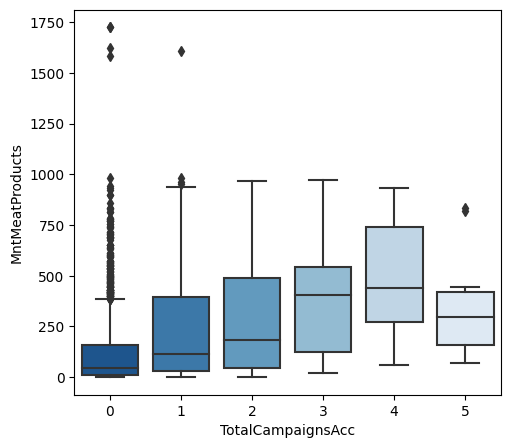

In [32]:
plt.figure(figsize=(5.5,5))
sns.boxplot(x='TotalCampaignsAcc', y='MntMeatProducts', data=data,palette='Blues_r');

**We note that there is a positive relationship between Total Campaigns Acc and increased MntMeatProducts sales but not like MntWines**

**This explains why the best selling products are MntWines and MntMeatProducts and MntGoldProds**

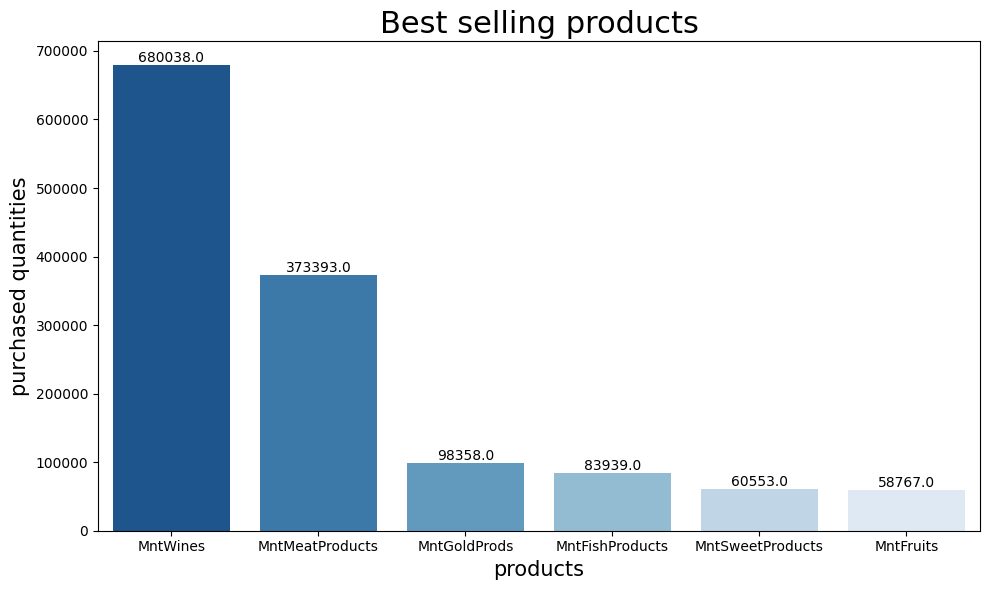

In [33]:
Products = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts','MntSweetProducts','MntGoldProds']

# Create a DataFrame to store the percentage of accepted campaigns
Products_df  = pd.DataFrame(data[Products ].sum(), columns=['Sum']).reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot
ax = sns.barplot(x='index', y='Sum', data=Products_df.sort_values('Sum', ascending=False))

# Set labels and title
plt.xlabel('products' ,size=15)
plt.ylabel('purchased quantities' ,size=15)
plt.title('Best selling products',size=22)

# Add percentage labels on top of each bar
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()

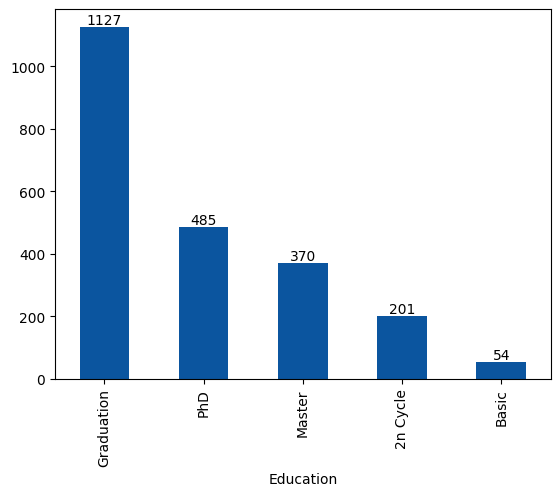

In [34]:
ax=data.Education.value_counts().plot.bar()
ax.bar_label(ax.containers[0])
plt.show;

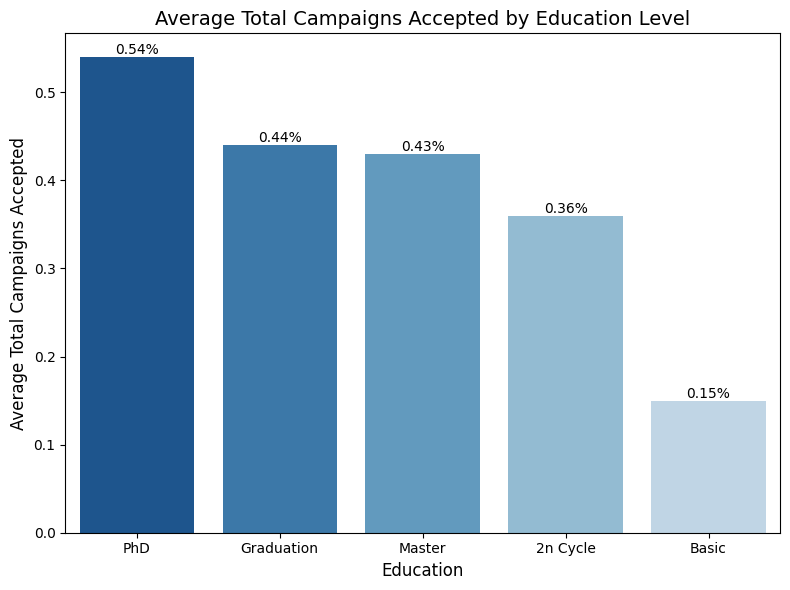

In [35]:
result = data[['Education','TotalCampaignsAcc']].groupby(['Education'],
                                as_index=False).mean().sort_values(by='TotalCampaignsAcc',ascending=False).round(2)

#figure
plt.figure(figsize=(8, 6))
ax =sns.barplot(x='Education', y='TotalCampaignsAcc', data=result)

# Set labels and title
plt.xlabel('Education', size=12)
plt.ylabel('Average Total Campaigns Accepted', size=12)
plt.title('Average Total Campaigns Accepted by Education Level', size=14)

# Add percentage labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()

**the acceptance rate for advertising campaigns among PhD holders is higher than that of graduates.**

**We must explain why PhDs have a higher appeal for advertising campaigns than graduates**

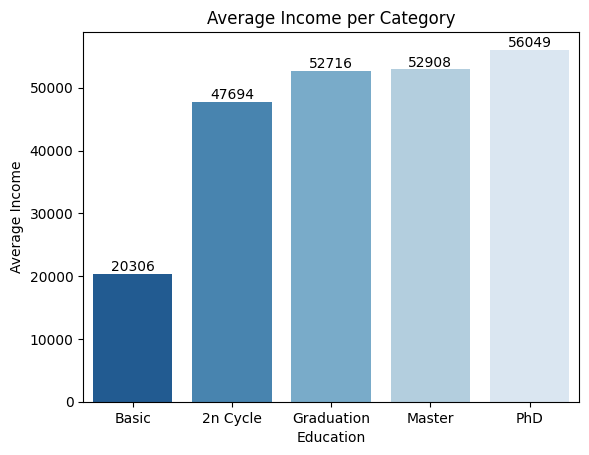

In [36]:
average_income = data.groupby('Education')['Income'].mean().reset_index()
average_income = average_income.sort_values(by='Income')

# Plotting
ax = sns.barplot(x=average_income['Education'],y= average_income['Income'],  data=data, palette='Blues_r')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.xlabel('Education')
plt.ylabel('Average Income')
plt.title('Average Income per Category')
plt.show()

**We note that the income of PHD holders is higher than that of graduates. We can verify this using hypotheses**

# Hypothesis Testing

In [37]:
data['Education']=data['Education'].map({'Basic':1,'2n Cycle':2,'Graduation':3,'Master':4,'PhD':5})

**First, I need to know whether the data follows a normal distribution or not. If it follows a normal distribution, I will use parametric tests. If it does not, I will transform the data to a normal distribution or use nonparametric tests.**

* Before starting, it's important to know that:
* p-value: Used to interpret the test
1. p-value <= alpha: reject H0, not normal.
1. p-value > alpha: fail to reject H0, normal
* Choose Significance Level(α) I will test our hypothesis at 5%

**There are several statistical tests that I can use to check for normality. Two common tests are the Shapiro-Wilk test and the Anderson-Darling test.**

In [38]:
# Normal distribution test
from scipy.stats import shapiro

# columns 
test_data = data[['Income','Education']]

# Shapiro-Wilk test
def normal_test(columns):
    for column in columns:
        statistic, p_value = shapiro(test_data[column])

# Analyze results
        alpha = 0.05
        if p_value < alpha:
             print(f'{column} : alpha is {alpha} < p_value is {p_value:.2f} We reject the null hypothesis: Data is not normally distributed.')
        else:
             print(f'{column} : alpha is {alpha} > p_value is {p_value:.2f} We Fail to reject the null hypothesis: Data follows a normal distribution.')
normal_test(test_data)

Income : alpha is 0.05 < p_value is 0.00 We reject the null hypothesis: Data is not normally distributed.
Education : alpha is 0.05 < p_value is 0.00 We reject the null hypothesis: Data is not normally distributed.


**The data is not normally distributed so I will use nonparametric tests**

**Mann-Whitney U test is a nonparametric test used to compare two independent groups**

* if the average income of PhD owners is statistically different from the average income of Master owners.
1. H_0 : The mean ranks of the two groups are equal
1. H_a : The mean ranks of the two groups are not equal

In [39]:
from scipy.stats import mannwhitneyu

#'Basic':1,'2n Cycle':2,'Graduation':3,'Master':4,'PhD':5
income_data_group1 = data[data['Education'] == 5]['Income']
income_data_group2 = data[data['Education'] == 3]['Income']

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(income_data_group1, income_data_group2)

# Set significance level
alpha = 0.05

# Analyze results
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in income means.")
else:
    print("Fail to reject the null hypothesis: No significant difference in income means.")


Reject the null hypothesis: There is a significant difference in income means.


Increasing income leads to increased spending and thus leads to increased acceptance of advertising campaigns. This explains the greater acceptance of advertising campaigns among PHD holders than graduates.

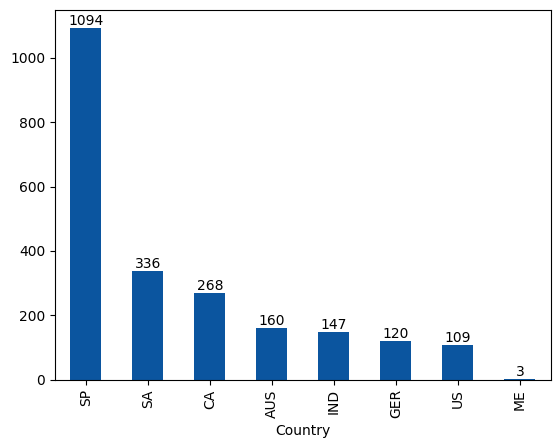

In [40]:
ax=data.Country.value_counts().plot.bar()
ax.bar_label(ax.containers[0])
plt.show;

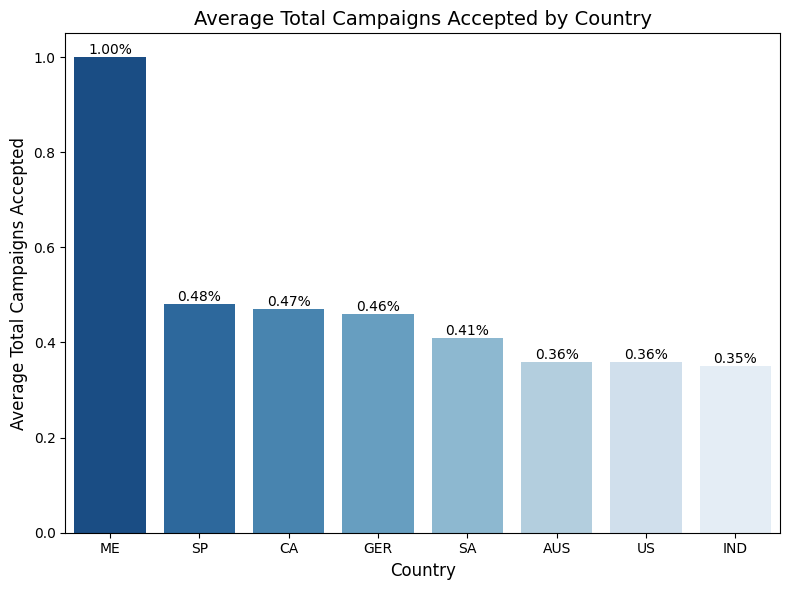

In [41]:
result = data[['Country','TotalCampaignsAcc']].groupby(['Country'],
                                as_index=False).mean().sort_values(by='TotalCampaignsAcc',ascending=False).round(2)

#figure
plt.figure(figsize=(8, 6))
ax =sns.barplot(x='Country', y='TotalCampaignsAcc', data=result, palette='Blues_r')

# Set labels and title
plt.xlabel('Country', size=12)
plt.ylabel('Average Total Campaigns Accepted', size=12)
plt.title('Average Total Campaigns Accepted by Country', size=14)

# Add percentage labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()

**The acceptance rate for advertising campaigns in SP , CA , SA is very weak, even though they represent the majority of our clients**

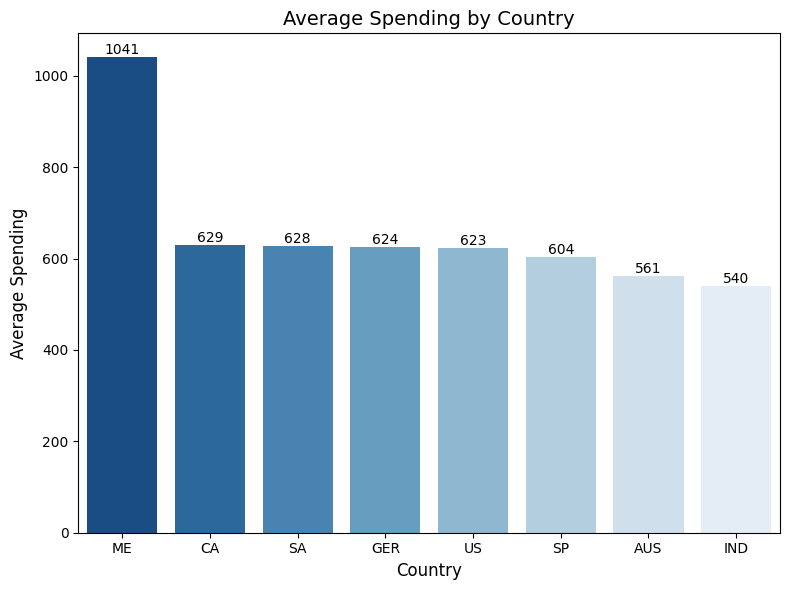

In [42]:
result = data[['Country','Spending']].groupby(['Country'],
                                as_index=False).mean().sort_values(by='Spending',ascending=False).round(2)

#figure
plt.figure(figsize=(8, 6))
ax =sns.barplot(x='Country', y='Spending', data=result, palette='Blues_r')

# Set labels and title
plt.xlabel('Country', size=12)
plt.ylabel('Average Spending', size=12)
plt.title('Average Spending by Country', size=14)

# Add percentage labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()

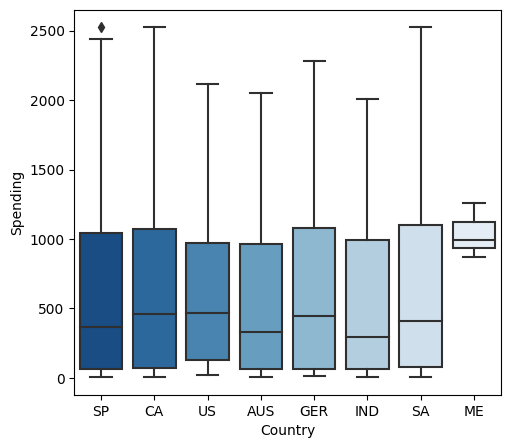

In [43]:
plt.figure(figsize=(5.5,5))
sns.boxplot(x='Country', y='Spending', data=data,palette='Blues_r');

# Conclusion and Recommendations

**After analyzing the data and discovering the reasons for the lack of increased acceptance of our advertising campaigns, this is because our advertising campaigns are directed to people with the highest income, even though most of our clients are not those with the highest income. I found this when I compared income, spending, and the total acceptance of advertising campaigns between doctoral holders and graduates. I also noticed that our best-selling products are expensive things. Prices such as wine, gold, and meat, and countries with higher income were more likely to spend and accept advertising campaigns.**
* **Therefore, we must divide our customers into groups and direct our advertising campaigns based on income and products that are appropriate for this group**